In [1]:
import pandas as pd

In [141]:
df = pd.read_csv("ConsumerElectronics (1).csv")
df.head()

/var/folders/cq/vv8124490dd5c15d35p_khvr0000gn/T/ipykernel_2320/869556991.py:1: DtypeWarning: Columns (6,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("ConsumerElectronics (1).csv")


,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400,1,\N,\N,COD,5,-1.01299130778588E+018,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900,1,\N,\N,COD,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990,1,\N,\N,COD,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690,1,\N,\N,Prepaid,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618,1,\N,\N,Prepaid,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3


In [143]:
df.shape

(1648824, 20)

In [145]:
df.isnull().sum()

fsn_id                             0
order_date                         0
Year                               0
Month                              0
order_id                           0
order_item_id                      0
gmv                                0
units                              0
deliverybdays                      0
deliverycdays                      0
s1_fact.order_payment_type         0
sla                                0
cust_id                            0
pincode                            0
product_analytic_super_category    0
product_analytic_category          0
product_analytic_sub_category      0
product_analytic_vertical          0
product_mrp                        0
product_procurement_sla            0
dtype: int64

In [147]:
df.dtypes

fsn_id                              object
order_date                          object
Year                                 int64
Month                                int64
order_id                           float64
order_item_id                      float64
gmv                                 object
units                                int64
deliverybdays                       object
deliverycdays                       object
s1_fact.order_payment_type          object
sla                                  int64
cust_id                             object
pincode                             object
product_analytic_super_category     object
product_analytic_category           object
product_analytic_sub_category       object
product_analytic_vertical           object
product_mrp                          int64
product_procurement_sla              int64
dtype: object

In [149]:
import pandas as pd
import numpy as np

In [151]:
# 1. Replace '\N' with NaN
df.replace('\\N', np.nan, inplace=True)

# 2. Convert order_date to datetime
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

# 3. Convert numeric columns to appropriate types
numeric_cols = ['order_id', 'order_item_id', 'gmv', 'units', 'sla', 'product_mrp', 'product_procurement_sla']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Convert cust_id and pincode to numeric for cleaning
df['cust_id'] = pd.to_numeric(df['cust_id'], errors='coerce')
df['pincode'] = pd.to_numeric(df['pincode'], errors='coerce')

# 4. Drop rows with invalid values
df = df[df['cust_id'] > 0]  # Remove rows with negative customer IDs
df = df[df['pincode'] > 0]  # Remove rows with negative pin codes

# 5. Check and remove duplicates
df.drop_duplicates(inplace=True)

# 6. Optionally extract additional columns from order_date
df['day'] = df['order_date'].dt.day
df['month'] = df['order_date'].dt.month
df['year'] = df['order_date'].dt.year

# Display cleaned dataset
print(df.head())

              fsn_id          order_date  Year  Month      order_id  \
4   ACCCX3S5AHMF55FV 2015-10-17 21:25:03  2015     10  4.419525e+15   
13  ACCCX3SG2GG9YYAH 2015-10-13 23:08:11  2015     10  4.416128e+15   
18  ACCCX3SG2GG9YYAH 2015-10-17 17:48:29  2015     10  3.419396e+15   
20  ACCCX3SG2GG9YYAH 2015-10-19 11:04:52  2015     10  2.420881e+15   
30  ACCCX3SG2GG9YYAH 2015-10-16 11:48:29  2015     10  1.418313e+15   

    order_item_id     gmv  units deliverybdays deliverycdays  ...  \
4    4.419525e+15  1618.0      1           NaN           NaN  ...   
13   4.416128e+15  6675.0      1           NaN           NaN  ...   
18   3.419396e+15  6749.0      1           NaN           NaN  ...   
20   2.420881e+15  6670.0      1           NaN           NaN  ...   
30   1.418313e+15  6003.0      1           NaN           NaN  ...   

         pincode  product_analytic_super_category  product_analytic_category  \
4   5.347354e+17                               CE            CameraAccessory  

In [153]:
df.shape

(389708, 23)

In [155]:
df.dtypes

fsn_id                                     object
order_date                         datetime64[ns]
Year                                        int64
Month                                       int64
order_id                                  float64
order_item_id                             float64
gmv                                       float64
units                                       int64
deliverybdays                              object
deliverycdays                              object
s1_fact.order_payment_type                 object
sla                                         int64
cust_id                                   float64
pincode                                   float64
product_analytic_super_category            object
product_analytic_category                  object
product_analytic_sub_category              object
product_analytic_vertical                  object
product_mrp                                 int64
product_procurement_sla                     int64


In [157]:
df.isnull().sum()

fsn_id                                  0
order_date                              0
Year                                    0
Month                                   0
order_id                                0
order_item_id                           0
gmv                                     0
units                                   0
deliverybdays                      304977
deliverycdays                      304977
s1_fact.order_payment_type              0
sla                                     0
cust_id                                 0
pincode                                 0
product_analytic_super_category         0
product_analytic_category               0
product_analytic_sub_category           0
product_analytic_vertical            1461
product_mrp                             0
product_procurement_sla                 0
day                                     0
month                                   0
year                                    0
dtype: int64

In [159]:
df.drop(['deliverybdays', 'deliverycdays'], axis=1, inplace=True)


In [161]:
df.isnull().sum()

fsn_id                                0
order_date                            0
Year                                  0
Month                                 0
order_id                              0
order_item_id                         0
gmv                                   0
units                                 0
s1_fact.order_payment_type            0
sla                                   0
cust_id                               0
pincode                               0
product_analytic_super_category       0
product_analytic_category             0
product_analytic_sub_category         0
product_analytic_vertical          1461
product_mrp                           0
product_procurement_sla               0
day                                   0
month                                 0
year                                  0
dtype: int64

In [163]:
df.shape

(389708, 21)

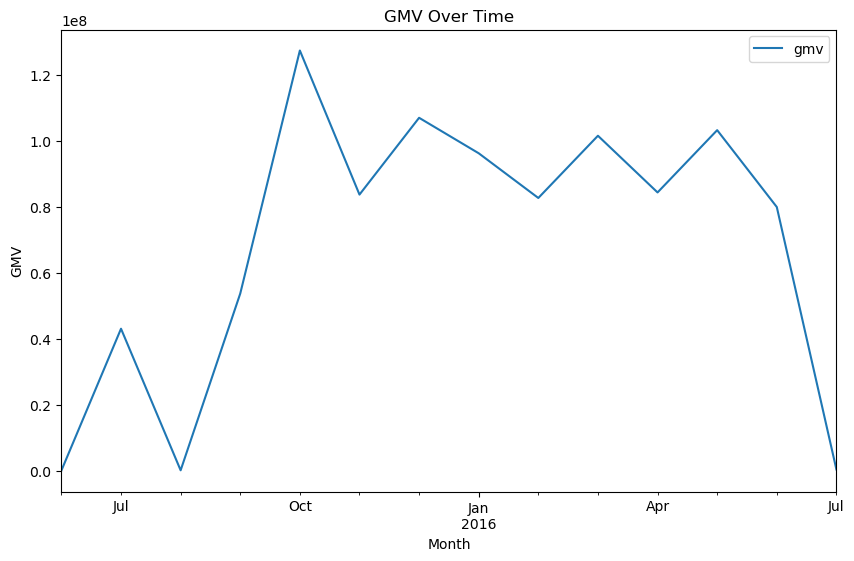

In [43]:
import matplotlib.pyplot as plt
df['order_date'] = pd.to_datetime(df['order_date'])
sales_trend = df.groupby(df['order_date'].dt.to_period('M')).agg({'gmv': 'sum'})
sales_trend.plot(kind='line', figsize=(10, 6), title='GMV Over Time', xlabel='Month', ylabel='GMV')
plt.show()


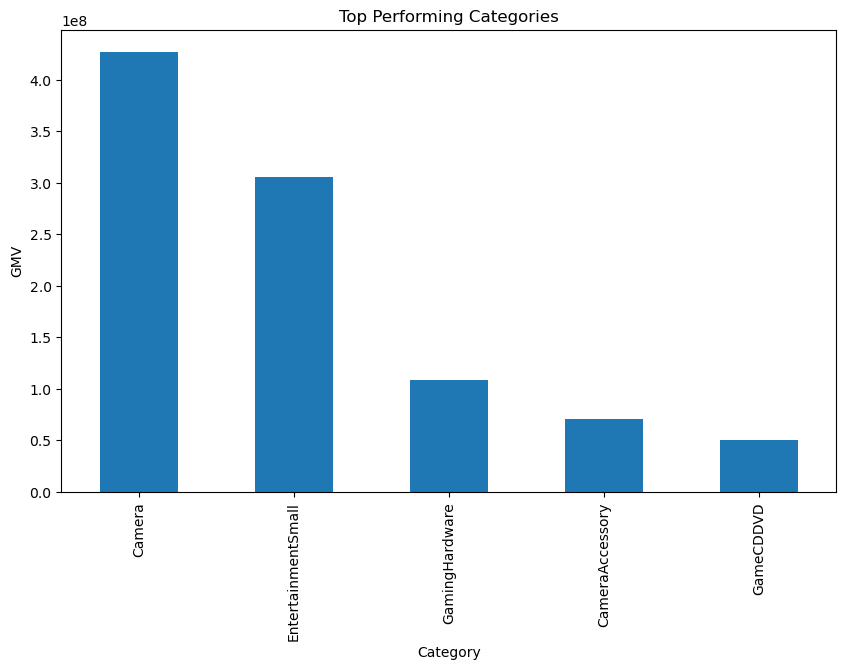

In [45]:
category_sales = df.groupby('product_analytic_category')['gmv'].sum().sort_values(ascending=False)
category_sales.plot(kind='bar', figsize=(10, 6), title='Top Performing Categories', xlabel='Category', ylabel='GMV')
plt.show()


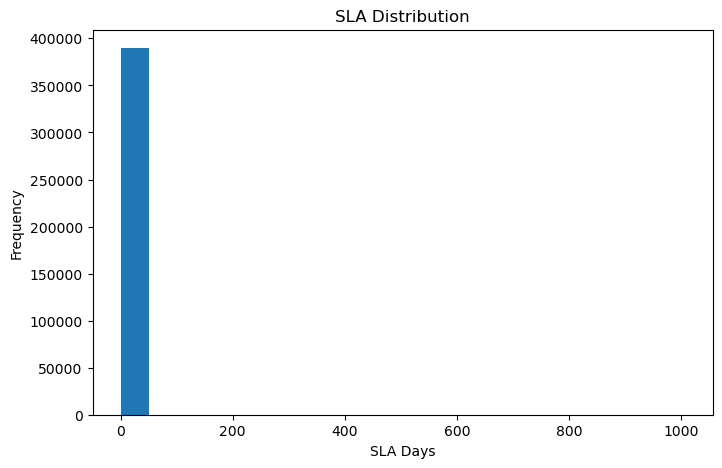

In [47]:
df['sla'].plot(kind='hist', bins=20, figsize=(8, 5), title='SLA Distribution', xlabel='SLA Days')
plt.show()


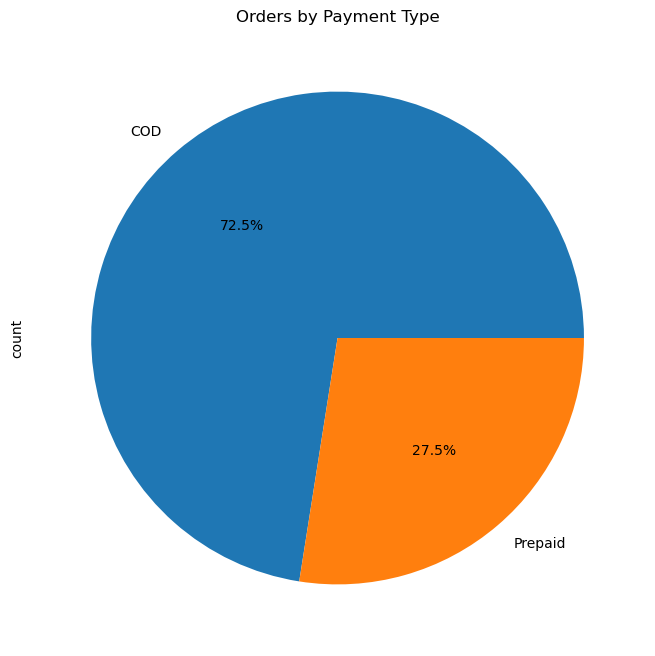

In [49]:
payment_counts = df['s1_fact.order_payment_type'].value_counts()
payment_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), title='Orders by Payment Type')
plt.show()


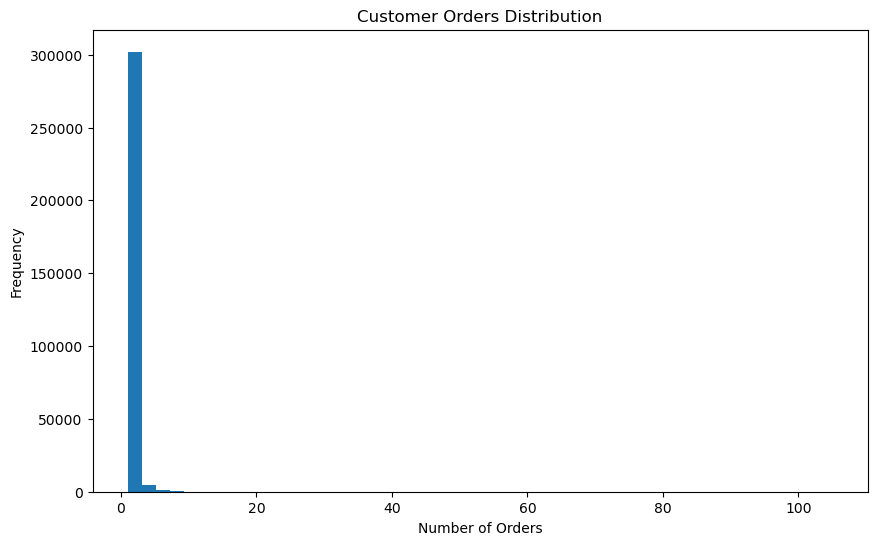

In [51]:
customer_orders = df['cust_id'].value_counts()
customer_orders.plot(kind='hist', bins=50, figsize=(10, 6), title='Customer Orders Distribution', xlabel='Number of Orders')
plt.show()


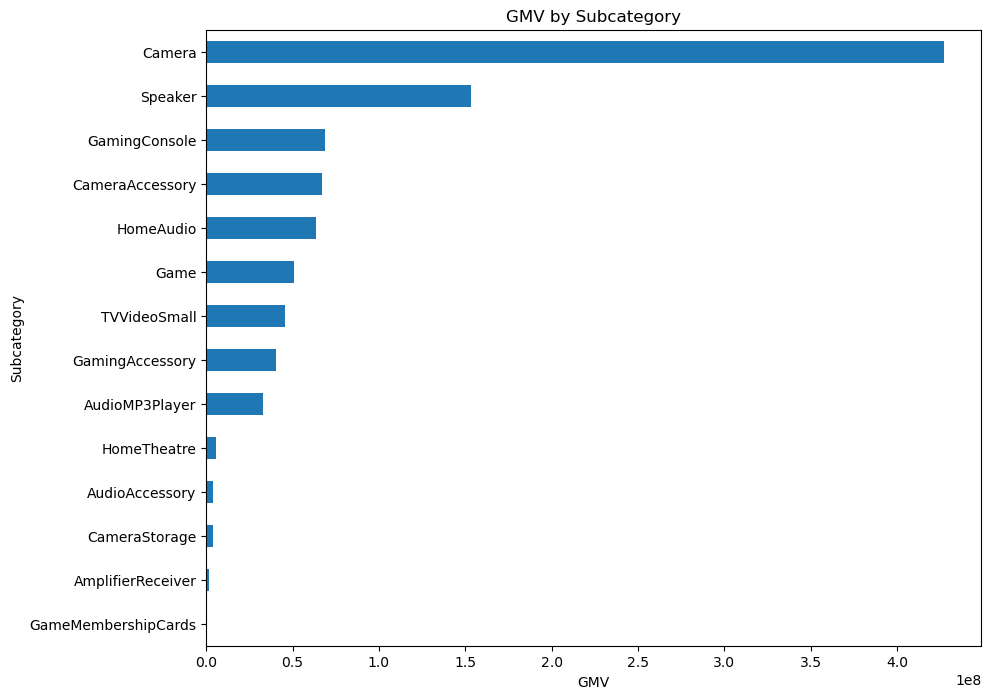

In [53]:
subcategory_gmv = df.groupby('product_analytic_sub_category')['gmv'].sum().sort_values(ascending=True)
subcategory_gmv.plot(kind='barh', figsize=(10, 8), title='GMV by Subcategory', xlabel='GMV', ylabel='Subcategory')
plt.show()


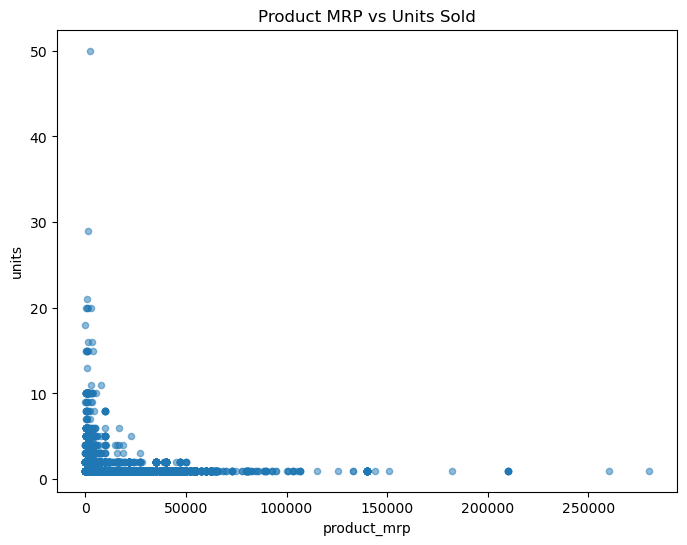

In [55]:
df.plot(kind='scatter', x='product_mrp', y='units', alpha=0.5, title='Product MRP vs Units Sold', figsize=(8, 6))
plt.show()


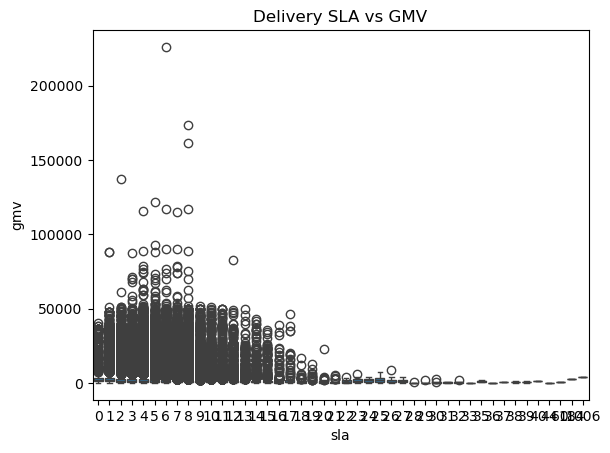

In [61]:
import seaborn as sns
sns.boxplot(data=df, x='sla', y='gmv')
plt.title('Delivery SLA vs GMV')
plt.show()


In [165]:
# Load the Excel file (assigning column names manually)
excel_file = pd.read_excel("Media data and other information.xlsx", header=None)
# Drop the first column if it is empty
excel_file.drop(columns=[0], inplace=True)

# Assign new column names
excel_file.columns = ['product_analytic_vertical', 'Frequency', 'Percent']

# Replace '\N' in the Excel file with NaN
excel_file.replace('\\N', np.nan, inplace=True)

# Ensure '\N' in the main dataset is replaced with NaN
df.replace('\\N', np.nan, inplace=True)

# Merge the two datasets on 'product_analytic_vertical'
merged_df = pd.merge(df, excel_file, on='product_analytic_vertical', how='left')

# Check the result
print(merged_df.head())

             fsn_id          order_date  Year  Month      order_id  \
0  ACCCX3S5AHMF55FV 2015-10-17 21:25:03  2015     10  4.419525e+15   
1  ACCCX3SG2GG9YYAH 2015-10-13 23:08:11  2015     10  4.416128e+15   
2  ACCCX3SG2GG9YYAH 2015-10-17 17:48:29  2015     10  3.419396e+15   
3  ACCCX3SG2GG9YYAH 2015-10-19 11:04:52  2015     10  2.420881e+15   
4  ACCCX3SG2GG9YYAH 2015-10-16 11:48:29  2015     10  1.418313e+15   

   order_item_id     gmv  units s1_fact.order_payment_type  sla  ...  \
0   4.419525e+15  1618.0      1                    Prepaid    6  ...   
1   4.416128e+15  6675.0      1                    Prepaid    7  ...   
2   3.419396e+15  6749.0      1                        COD    6  ...   
3   2.420881e+15  6670.0      1                        COD    8  ...   
4   1.418313e+15  6003.0      1                    Prepaid    8  ...   

   product_analytic_category  product_analytic_sub_category  \
0            CameraAccessory                CameraAccessory   
1            CameraA

In [169]:
# Load ONTARIO 2015 and 2016 weather datasets
weather_2015 = pd.read_csv("ONTARIO-2015-1-Table 1.csv")  
weather_2016 = pd.read_csv("ONTARIO-2016-1-Table 1.csv")

# Keep necessary columns and combine datasets
weather_columns = ['Date/Time', 'Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)', 
                   'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)']
weather_2015 = weather_2015[weather_columns]
weather_2016 = weather_2016[weather_columns]
weather = pd.concat([weather_2015, weather_2016])

# Preprocess and clean weather data
weather['Date/Time'] = pd.to_datetime(weather['Date/Time'])
weather.replace({'M': pd.NA, 'T': 0.01}, inplace=True)  # Handle missing or trace values
weather.dropna(inplace=True)  # Drop rows with missing values


ValueError: time data "Date/Time" doesn't match format "%Y-%m-%d", at position 731. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [171]:
# Check the first few entries in the Date/Time column
print(weather['Date/Time'].head(10))


0    2015-01-01
1    2015-01-02
2    2015-01-03
3    2015-01-04
4    2015-01-05
5    2015-01-06
6    2015-01-07
7    2015-01-08
8    2015-01-09
9    2015-01-10
Name: Date/Time, dtype: object


In [173]:
weather['Date/Time'] = weather['Date/Time'].str.strip()


In [175]:
weather['Date/Time'] = pd.to_datetime(weather['Date/Time'], format="%Y-%m-%d", errors='coerce')


In [177]:
print(weather[weather['Date/Time'].isna()])  # Rows where parsing failed


    Date/Time  Max Temp (°C)  Min Temp (°C)  Mean Temp (°C)  Total Rain (mm)  \
366       NaT  Max Temp (°C)  Min Temp (°C)  Mean Temp (°C)  Total Rain (mm)   

     Total Snow (cm)  Total Precip (mm)  
366  Total Snow (cm)  Total Precip (mm)  


In [179]:
weather = weather[~weather['Date/Time'].isna()]  # Keep only rows with valid Date/Time


In [181]:
print(weather[weather['Date/Time'].isna()])  # Should return an empty DataFrame


Empty DataFrame
Columns: [Date/Time, Max Temp (°C), Min Temp (°C), Mean Temp (°C), Total Rain (mm), Total Snow (cm), Total Precip (mm)]
Index: []


In [183]:
weather['Date/Time'] = pd.to_datetime(weather['Date/Time'], format="%Y-%m-%d", errors='coerce')


In [185]:
# Merge with the main dataset
merged_df['order_date'] = pd.to_datetime(merged_df['order_date'])
final_merged_df = pd.merge(merged_df, weather, left_on='order_date', right_on='Date/Time', how='left')
final_merged_df.drop(columns=['Date/Time'], inplace=True)


In [187]:
final_merged_df.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,s1_fact.order_payment_type,sla,...,month,year,Frequency,Percent,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm)
0,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618.0,1,Prepaid,6,...,10,2015,37909,2.299154,NaN,NaN,NaN,NaN,NaN,NaN
1,ACCCX3SG2GG9YYAH,2015-10-13 23:08:11,2015,10,4.416128e+15,4.416128e+15,6675.0,1,Prepaid,7,...,10,2015,35474,2.151473,NaN,NaN,NaN,NaN,NaN,NaN
2,ACCCX3SG2GG9YYAH,2015-10-17 17:48:29,2015,10,3.419396e+15,3.419396e+15,6749.0,1,COD,6,...,10,2015,35474,2.151473,NaN,NaN,NaN,NaN,NaN,NaN
3,ACCCX3SG2GG9YYAH,2015-10-19 11:04:52,2015,10,2.420881e+15,2.420881e+15,6670.0,1,COD,8,...,10,2015,35474,2.151473,NaN,NaN,NaN,NaN,NaN,NaN
4,ACCCX3SG2GG9YYAH,2015-10-16 11:48:29,2015,10,1.418313e+15,1.418313e+15,6003.0,1,Prepaid,8,...,10,2015,35474,2.151473,NaN,NaN,NaN,NaN,NaN,NaN


In [191]:
# Load product details dataset
product_details = pd.read_csv("Product_details.csv")

# Merge product details with sales data
merged_sales = pd.merge(final_merged_df, product_details, 
                        left_on=['product_analytic_super_category', 'product_analytic_category',
                                 'product_analytic_sub_category', 'product_analytic_vertical'],
                        right_on=['super_category', 'category', 'sub_category', 'vertical'], 
                        how='left')


In [193]:
final_merged_df.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,s1_fact.order_payment_type,sla,...,month,year,Frequency,Percent,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm)
0,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618.0,1,Prepaid,6,...,10,2015,37909,2.299154,NaN,NaN,NaN,NaN,NaN,NaN
1,ACCCX3SG2GG9YYAH,2015-10-13 23:08:11,2015,10,4.416128e+15,4.416128e+15,6675.0,1,Prepaid,7,...,10,2015,35474,2.151473,NaN,NaN,NaN,NaN,NaN,NaN
2,ACCCX3SG2GG9YYAH,2015-10-17 17:48:29,2015,10,3.419396e+15,3.419396e+15,6749.0,1,COD,6,...,10,2015,35474,2.151473,NaN,NaN,NaN,NaN,NaN,NaN
3,ACCCX3SG2GG9YYAH,2015-10-19 11:04:52,2015,10,2.420881e+15,2.420881e+15,6670.0,1,COD,8,...,10,2015,35474,2.151473,NaN,NaN,NaN,NaN,NaN,NaN
4,ACCCX3SG2GG9YYAH,2015-10-16 11:48:29,2015,10,1.418313e+15,1.418313e+15,6003.0,1,Prepaid,8,...,10,2015,35474,2.151473,NaN,NaN,NaN,NaN,NaN,NaN


In [197]:
# Create weather condition categories
def categorize_weather(row):
    if row['Total Snow (cm)'] > 10:
        return 'Heavy Snow'
    elif row['Total Rain (mm)'] > 10:
        return 'Heavy Rain'
    elif row['Mean Temp (°C)'] > 25:
        return 'Hot'
    elif row['Mean Temp (°C)'] < 10:
        return 'Cold'
    else:
        return 'Moderate'

final_merged_df['weather_condition'] = final_merged_df.apply(categorize_weather, axis=1)


In [203]:
final_merged_df.columns

Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id',
       'gmv', 'units', 's1_fact.order_payment_type', 'sla', 'cust_id',
       'pincode', 'product_analytic_super_category',
       'product_analytic_category', 'product_analytic_sub_category',
       'product_analytic_vertical', 'product_mrp', 'product_procurement_sla',
       'day', 'month', 'year', 'Frequency', 'Percent', 'Max Temp (°C)',
       'Min Temp (°C)', 'Mean Temp (°C)', 'Total Rain (mm)', 'Total Snow (cm)',
       'Total Precip (mm)', 'weather_condition'],
      dtype='object')

In [205]:
final_merged_df['revenue_per_unit'] = final_merged_df['gmv'] / final_merged_df['units']


In [207]:
final_merged_df['profit_margin'] = (final_merged_df['product_mrp'] - final_merged_df['gmv']) / final_merged_df['product_mrp']


In [209]:
final_merged_df.shape

(392630, 32)

In [211]:
bins = [0, 1000, 5000, 10000, 50000, float('inf')]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
final_merged_df['sales_category'] = pd.cut(final_merged_df['gmv'], bins=bins, labels=labels)


In [213]:
season_mapping = {12: 'Winter', 1: 'Winter', 2: 'Winter',
                  3: 'Spring', 4: 'Spring', 5: 'Spring',
                  6: 'Summer', 7: 'Summer', 8: 'Summer',
                  9: 'Autumn', 10: 'Autumn', 11: 'Autumn'}
final_merged_df['season'] = final_merged_df['month'].map(season_mapping)


In [215]:
final_merged_df['temp_range'] = final_merged_df['Max Temp (°C)'] - final_merged_df['Min Temp (°C)']


# Insights to Derive

## Overall Sales Trends Over Time:

In [219]:
final_merged_df['month_year'] = final_merged_df['order_date'].dt.to_period('M')


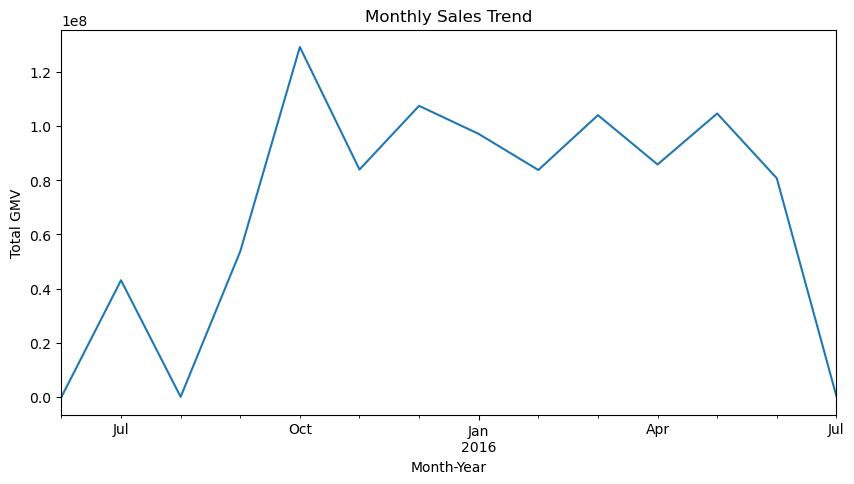

In [221]:
import matplotlib.pyplot as plt
monthly_sales = final_merged_df.groupby('month_year')['gmv'].sum()
monthly_sales.plot(kind='line', figsize=(10, 5), title='Monthly Sales Trend', xlabel='Month-Year', ylabel='Total GMV')
plt.show()


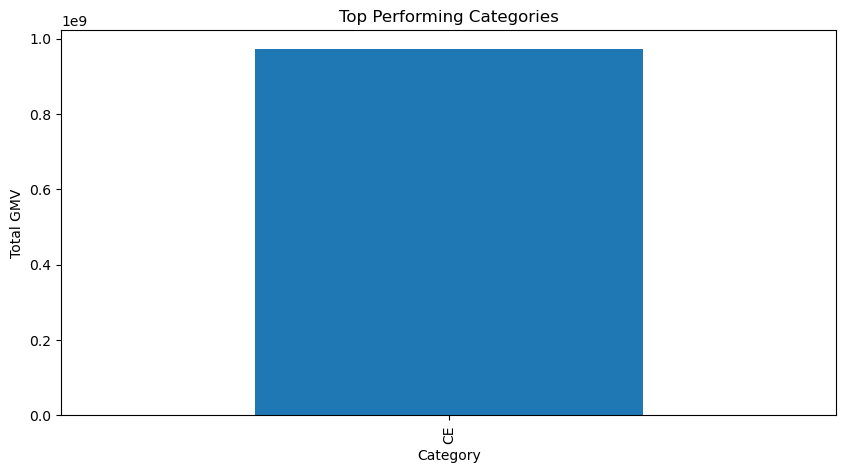

In [223]:
category_sales = final_merged_df.groupby('product_analytic_super_category')['gmv'].sum().sort_values(ascending=False)
category_sales.plot(kind='bar', figsize=(10, 5), title='Top Performing Categories', xlabel='Category', ylabel='Total GMV')
plt.show()


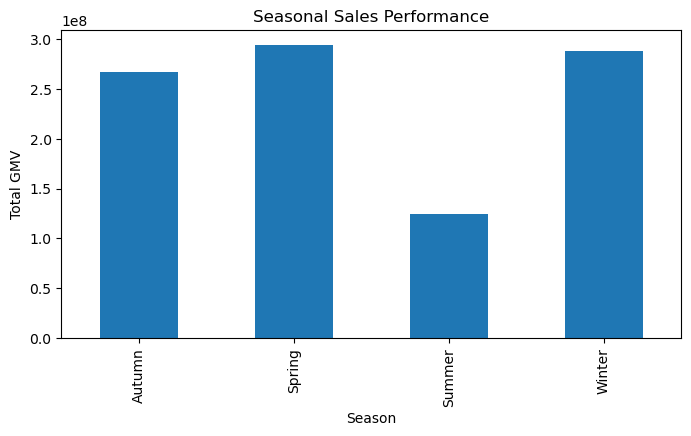

In [225]:
seasonal_sales = final_merged_df.groupby('season')['gmv'].sum()
seasonal_sales.plot(kind='bar', figsize=(8, 4), title='Seasonal Sales Performance', xlabel='Season', ylabel='Total GMV')
plt.show()


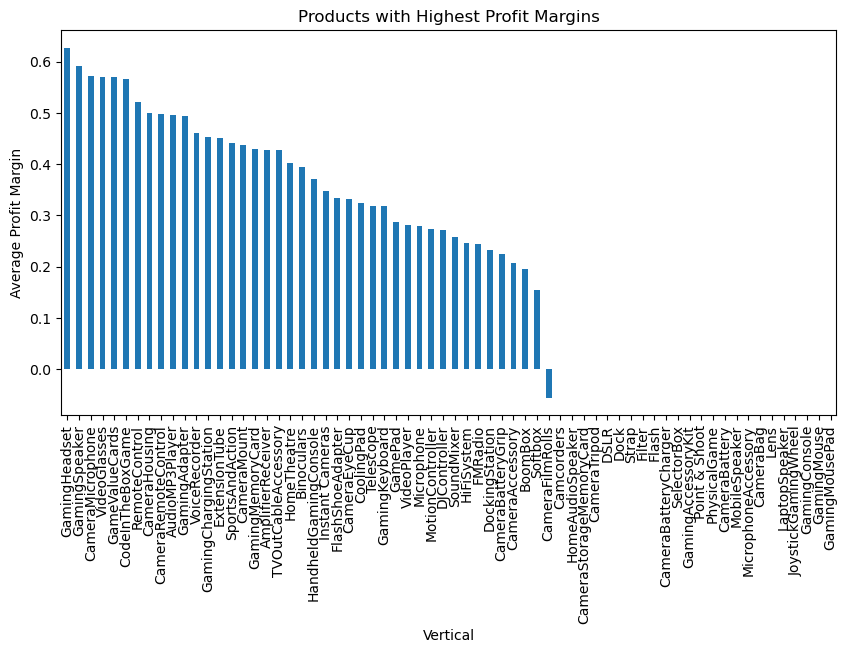

In [229]:
high_margin_products = final_merged_df.groupby('product_analytic_vertical')['profit_margin'].mean().sort_values(ascending=False)
high_margin_products.plot(kind='bar', figsize=(10, 5), title='Products with Highest Profit Margins', xlabel='Vertical', ylabel='Average Profit Margin')
plt.show()


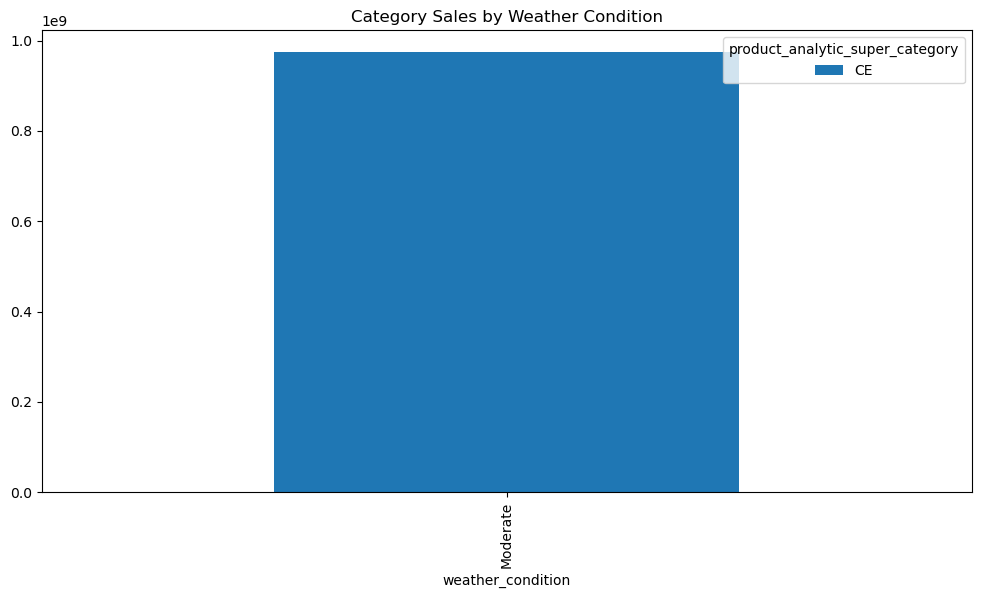

In [231]:
weather_category_sales = final_merged_df.groupby(['weather_condition', 'product_analytic_super_category'])['gmv'].sum().unstack()
weather_category_sales.plot(kind='bar', stacked=True, figsize=(12, 6), title='Category Sales by Weather Condition')
plt.show()


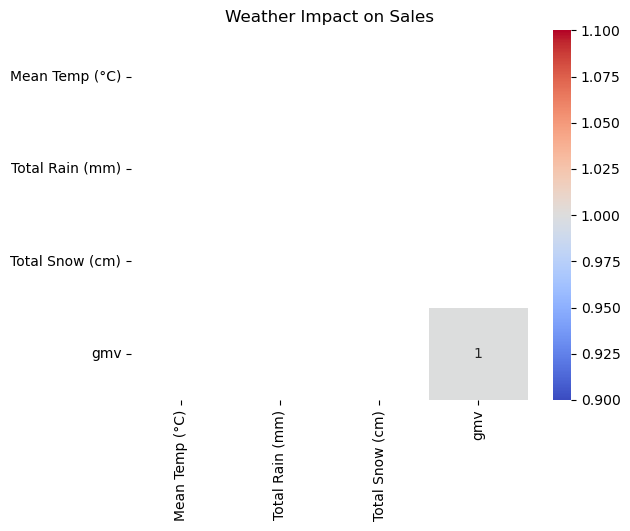

In [235]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation
weather_correlation = final_merged_df[['Mean Temp (°C)', 'Total Rain (mm)', 'Total Snow (cm)', 'gmv']].corr()

# Create heatmap
sns.heatmap(weather_correlation, annot=True, cmap='coolwarm')

# Set the title using plt.title()
plt.title('Weather Impact on Sales')
plt.show()


In [237]:
weather_nulls = final_merged_df[['Mean Temp (°C)', 'Total Rain (mm)', 'Total Snow (cm)']].isnull().mean()
print(weather_nulls)


Mean Temp (°C)     0.999997
Total Rain (mm)    0.999997
Total Snow (cm)    0.999997
dtype: float64


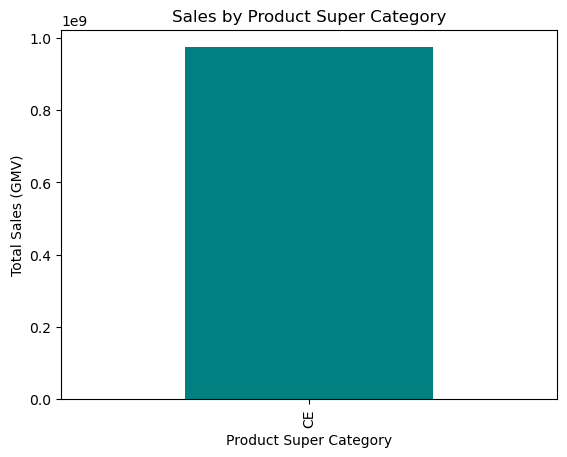

In [239]:
category_sales = final_merged_df.groupby('product_analytic_super_category')['gmv'].sum().sort_values(ascending=False)
category_sales.plot(kind='bar', title='Sales by Product Super Category', color='teal')
plt.xlabel('Product Super Category')
plt.ylabel('Total Sales (GMV)')
plt.show()


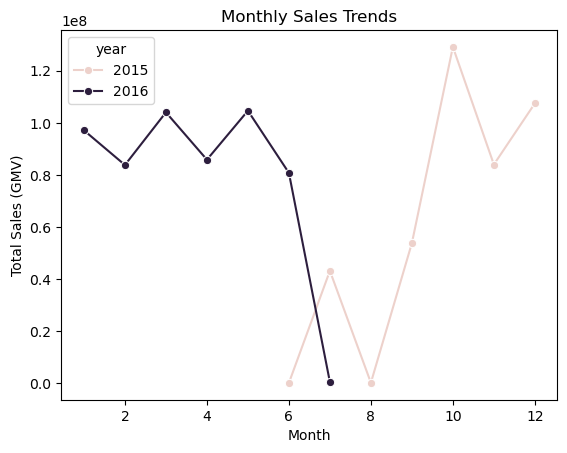

In [241]:
monthly_sales = final_merged_df.groupby(['year', 'month'])['gmv'].sum().reset_index()
sns.lineplot(data=monthly_sales, x='month', y='gmv', hue='year', marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales (GMV)')
plt.show()


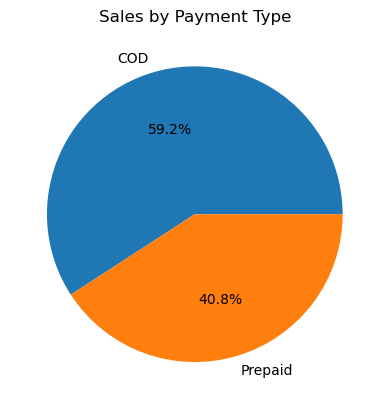

In [243]:
payment_type_sales = final_merged_df.groupby('s1_fact.order_payment_type')['gmv'].sum()
payment_type_sales.plot(kind='pie', autopct='%1.1f%%', title='Sales by Payment Type')
plt.ylabel('')
plt.show()


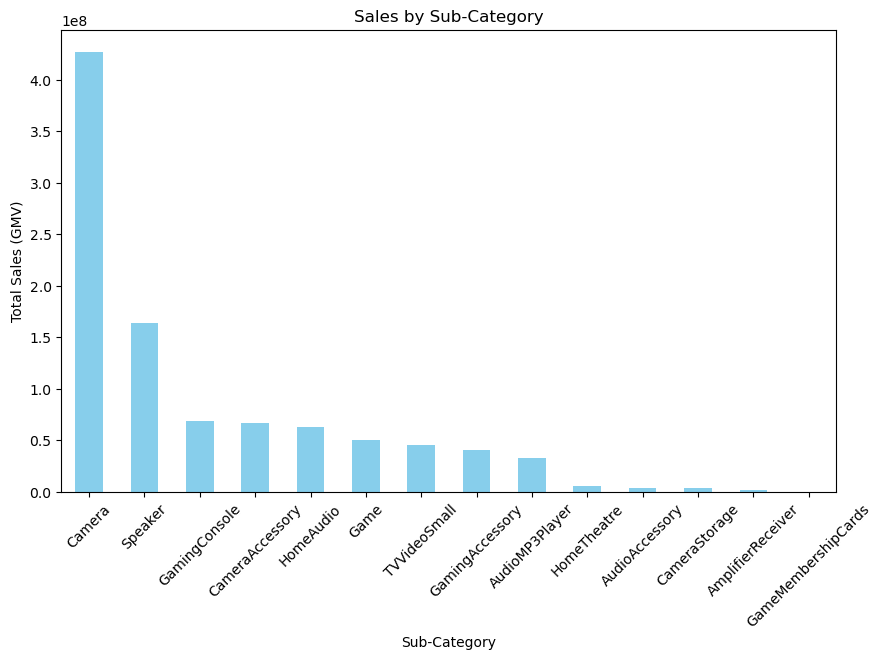

In [245]:
sub_category_sales = final_merged_df.groupby('product_analytic_sub_category')['gmv'].sum().sort_values(ascending=False)
sub_category_sales.plot(kind='bar', figsize=(10, 6), color='skyblue', title='Sales by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales (GMV)')
plt.xticks(rotation=45)
plt.show()


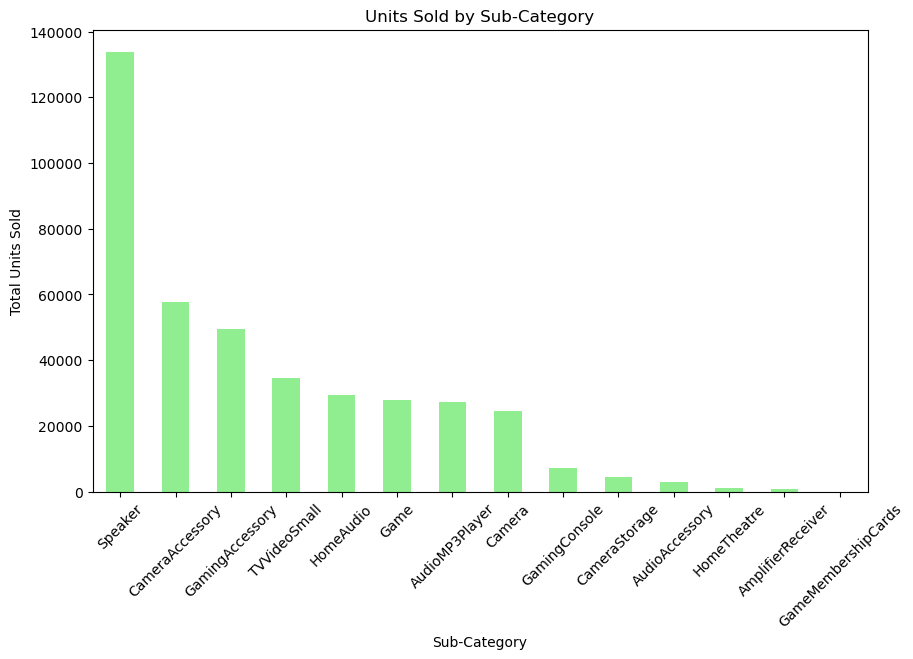

In [247]:
sub_category_units = final_merged_df.groupby('product_analytic_sub_category')['units'].sum().sort_values(ascending=False)
sub_category_units.plot(kind='bar', figsize=(10, 6), color='lightgreen', title='Units Sold by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45)
plt.show()


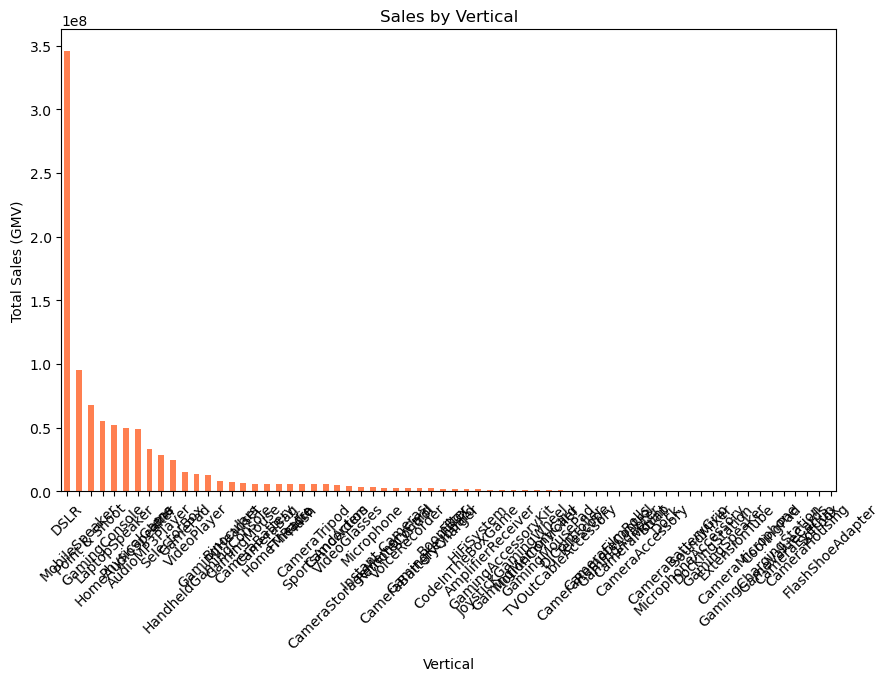

In [249]:
vertical_sales = final_merged_df.groupby('product_analytic_vertical')['gmv'].sum().sort_values(ascending=False)
vertical_sales.plot(kind='bar', figsize=(10, 6), color='coral', title='Sales by Vertical')
plt.xlabel('Vertical')
plt.ylabel('Total Sales (GMV)')
plt.xticks(rotation=45)
plt.show()


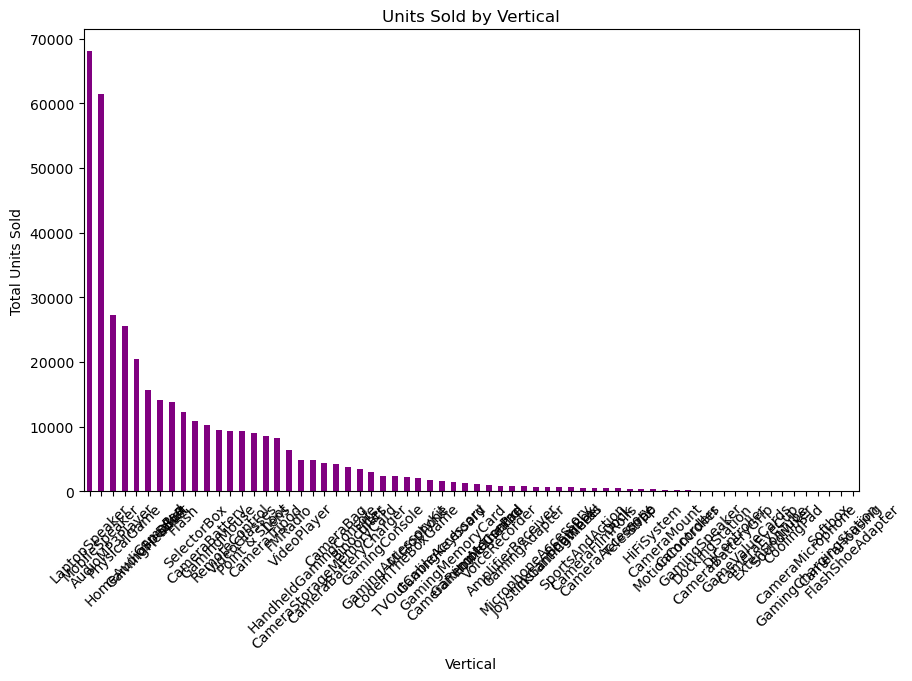

In [251]:
vertical_units = final_merged_df.groupby('product_analytic_vertical')['units'].sum().sort_values(ascending=False)
vertical_units.plot(kind='bar', figsize=(10, 6), color='purple', title='Units Sold by Vertical')
plt.xlabel('Vertical')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45)
plt.show()


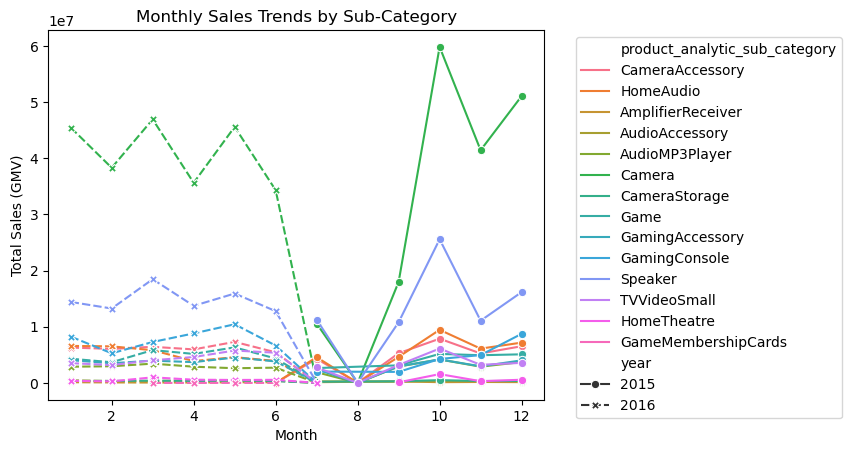

In [253]:
monthly_sub_category_sales = final_merged_df.groupby(['year', 'month', 'product_analytic_sub_category'])['gmv'].sum().reset_index()
sns.lineplot(data=monthly_sub_category_sales, x='month', y='gmv', hue='product_analytic_sub_category', style='year', markers=True)
plt.title('Monthly Sales Trends by Sub-Category')
plt.xlabel('Month')
plt.ylabel('Total Sales (GMV)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


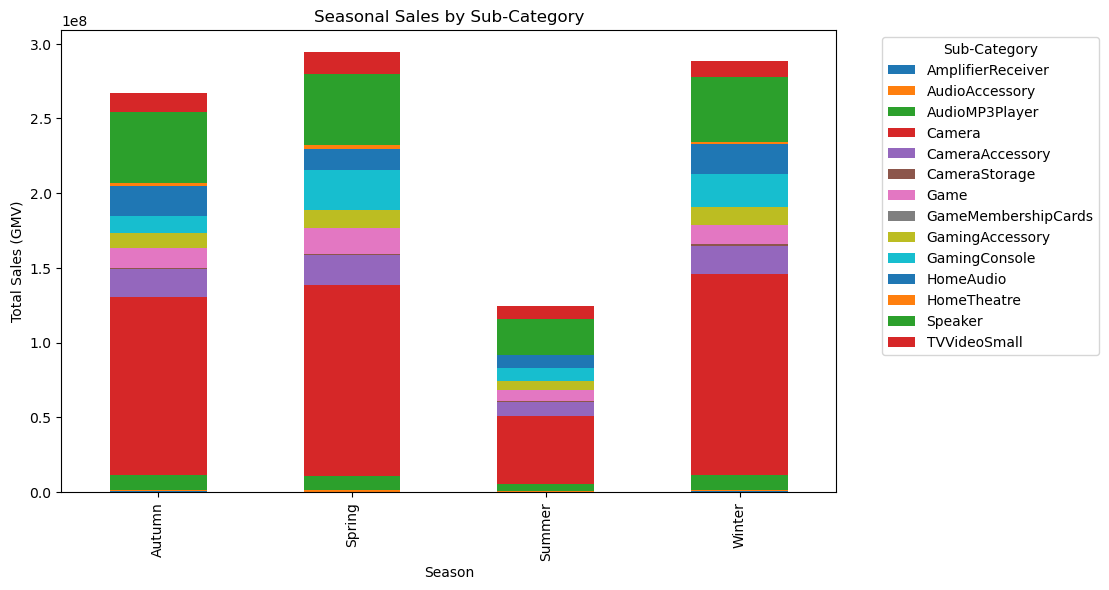

In [255]:
seasonal_sales = final_merged_df.groupby(['season', 'product_analytic_sub_category'])['gmv'].sum().unstack()
seasonal_sales.plot(kind='bar', stacked=True, figsize=(10, 6), title='Seasonal Sales by Sub-Category')
plt.xlabel('Season')
plt.ylabel('Total Sales (GMV)')
plt.legend(title='Sub-Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


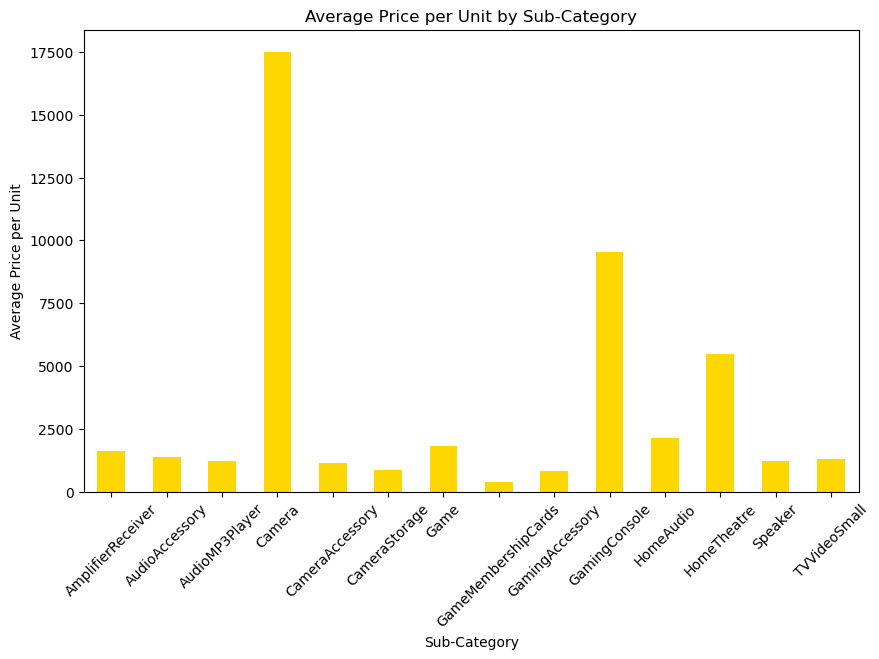

In [257]:
avg_price_per_unit = final_merged_df.groupby('product_analytic_sub_category')['gmv'].sum() / final_merged_df.groupby('product_analytic_sub_category')['units'].sum()
avg_price_per_unit.plot(kind='bar', figsize=(10, 6), color='gold', title='Average Price per Unit by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Average Price per Unit')
plt.xticks(rotation=45)
plt.show()


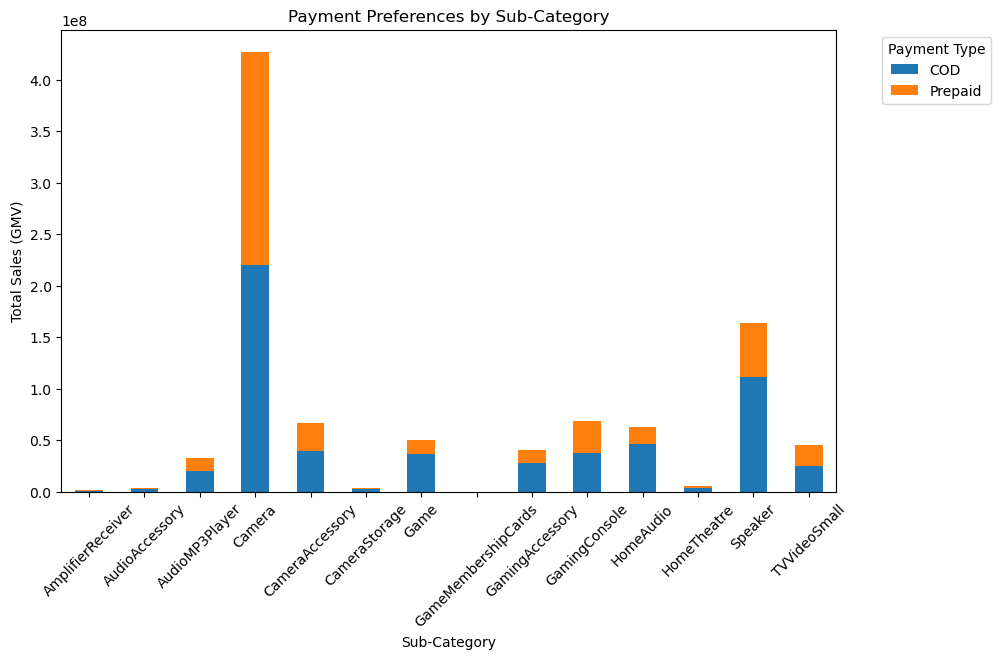

In [259]:
payment_sub_category = final_merged_df.groupby(['product_analytic_sub_category', 's1_fact.order_payment_type'])['gmv'].sum().unstack()
payment_sub_category.plot(kind='bar', stacked=True, figsize=(10, 6), title='Payment Preferences by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales (GMV)')
plt.legend(title='Payment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()


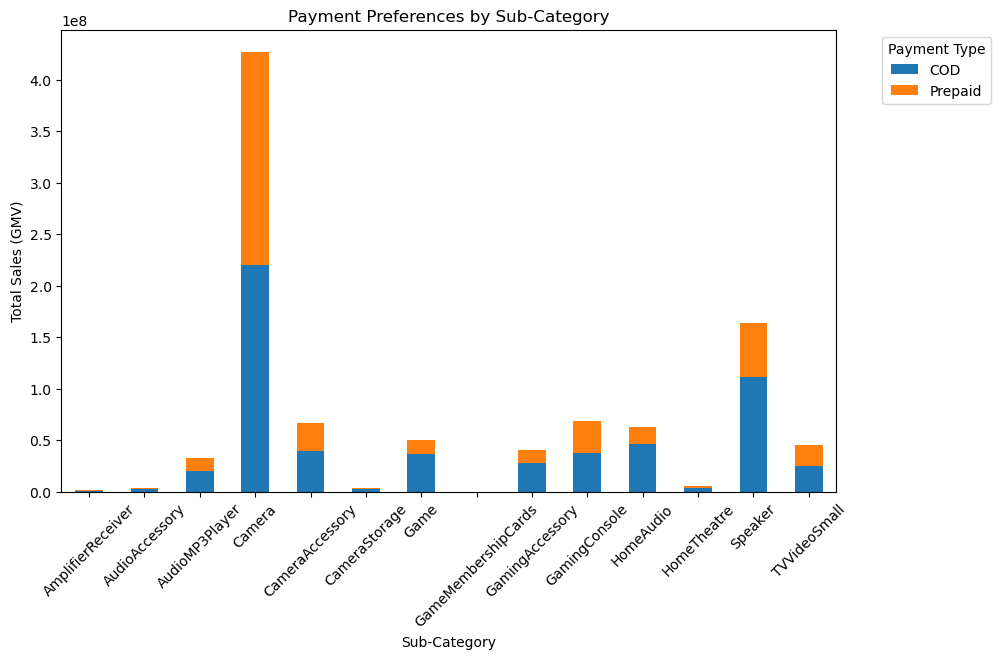

In [261]:
payment_sub_category = final_merged_df.groupby(['product_analytic_sub_category', 's1_fact.order_payment_type'])['gmv'].sum().unstack()
payment_sub_category.plot(kind='bar', stacked=True, figsize=(10, 6), title='Payment Preferences by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales (GMV)')
plt.legend(title='Payment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()


In [263]:
final_merged_df.columns

Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id',
       'gmv', 'units', 's1_fact.order_payment_type', 'sla', 'cust_id',
       'pincode', 'product_analytic_super_category',
       'product_analytic_category', 'product_analytic_sub_category',
       'product_analytic_vertical', 'product_mrp', 'product_procurement_sla',
       'day', 'month', 'year', 'Frequency', 'Percent', 'Max Temp (°C)',
       'Min Temp (°C)', 'Mean Temp (°C)', 'Total Rain (mm)', 'Total Snow (cm)',
       'Total Precip (mm)', 'weather_condition', 'revenue_per_unit',
       'profit_margin', 'sales_category', 'season', 'temp_range',
       'month_year'],
      dtype='object')

In [265]:
import pandas as pd

# Assuming `final_merged_df` is your DataFrame
# Ensure Categorical Columns
categorical_columns = [
    'product_analytic_super_category', 'product_analytic_category',
    'season', 'weather_condition', 'sales_category'
]
for col in categorical_columns:
    final_merged_df[col] = final_merged_df[col].astype('category')

# Ensure Numerical Columns
numerical_columns = [
    'gmv', 'units', 'revenue_per_unit', 'profit_margin',
    'Mean Temp (°C)', 'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)'
]
for col in numerical_columns:
    final_merged_df[col] = pd.to_numeric(final_merged_df[col], errors='coerce')

# Ensure Date Columns
date_columns = ['order_date', 'month_year']
for col in date_columns:
    final_merged_df[col] = pd.to_datetime(final_merged_df[col], errors='coerce')

# Print Data Types to Confirm
print(final_merged_df.dtypes)


fsn_id                                     object
order_date                         datetime64[ns]
Year                                        int64
Month                                       int64
order_id                                  float64
order_item_id                             float64
gmv                                       float64
units                                       int64
s1_fact.order_payment_type                 object
sla                                         int64
cust_id                                   float64
pincode                                   float64
product_analytic_super_category          category
product_analytic_category                category
product_analytic_sub_category              object
product_analytic_vertical                  object
product_mrp                                 int64
product_procurement_sla                     int64
day                                         int32
month                                       int32


In [267]:
# Save as CSV
final_merged_df.to_csv('ecommerce_data.csv', index=False)
print("Data exported to 'ecommerce_data.csv'")


Data exported to 'ecommerce_data.csv'


In [269]:
# Verify CSV
verified_csv = pd.read_csv('ecommerce_data.csv')
print(verified_csv.head())


             fsn_id           order_date  Year  Month      order_id  \
0  ACCCX3S5AHMF55FV  2015-10-17 21:25:03  2015     10  4.419525e+15   
1  ACCCX3SG2GG9YYAH  2015-10-13 23:08:11  2015     10  4.416128e+15   
2  ACCCX3SG2GG9YYAH  2015-10-17 17:48:29  2015     10  3.419396e+15   
3  ACCCX3SG2GG9YYAH  2015-10-19 11:04:52  2015     10  2.420881e+15   
4  ACCCX3SG2GG9YYAH  2015-10-16 11:48:29  2015     10  1.418313e+15   

   order_item_id     gmv  units s1_fact.order_payment_type  sla  ...  \
0   4.419525e+15  1618.0      1                    Prepaid    6  ...   
1   4.416128e+15  6675.0      1                    Prepaid    7  ...   
2   3.419396e+15  6749.0      1                        COD    6  ...   
3   2.420881e+15  6670.0      1                        COD    8  ...   
4   1.418313e+15  6003.0      1                    Prepaid    8  ...   

   Total Rain (mm)  Total Snow (cm) Total Precip (mm) weather_condition  \
0              NaN              NaN               NaN          Mo

/var/folders/cq/vv8124490dd5c15d35p_khvr0000gn/T/ipykernel_2320/3729469942.py:2: DtypeWarning: Columns (21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  verified_csv = pd.read_csv('ecommerce_data.csv')
